# Analysis 

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pathlib import Path
import datetime
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import ttest_1samp

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
df = pd.read_csv('preprocessed_game_info.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2004 non-null   object 
 1   STORE_GENRE            2004 non-null   object 
 2   RATING_SCORE           2004 non-null   float64
 3   N_SUPPORTED_LANGUAGES  2004 non-null   int64  
 4   DEVELOPERS             2004 non-null   object 
 5   POSITIVE_REVIEWS       2004 non-null   int64  
 6   NEGATIVE_REVIEWS       2004 non-null   int64  
 7   TECHNOLOGIES           2004 non-null   object 
 8   PRICE                  2004 non-null   float64
 9   24_HOUR_PEAK           2004 non-null   int64  
 10  PUBLISH_YEAR           2004 non-null   int64  
 11  Linux                  2004 non-null   int64  
 12  Windows                2004 non-null   int64  
 13  macOS                  2004 non-null   int64  
 14  TWITCH_PEAK_HOUR       2004 non-null   int64  
 15  TWIT

correlation

[Text(0.5, 0, 'RATING_SCORE'),
 Text(1.5, 0, 'N_SUPPORTED_LANGUAGES'),
 Text(2.5, 0, 'POSITIVE_REVIEWS'),
 Text(3.5, 0, 'NEGATIVE_REVIEWS'),
 Text(4.5, 0, 'PRICE'),
 Text(5.5, 0, '24_HOUR_PEAK'),
 Text(6.5, 0, 'PUBLISH_YEAR'),
 Text(7.5, 0, 'Linux'),
 Text(8.5, 0, 'Windows'),
 Text(9.5, 0, 'macOS'),
 Text(10.5, 0, 'TWITCH_PEAK_HOUR'),
 Text(11.5, 0, 'TWITCH_PEAK_YEAR'),
 Text(12.5, 0, 'TOTAL_REVIEW')]

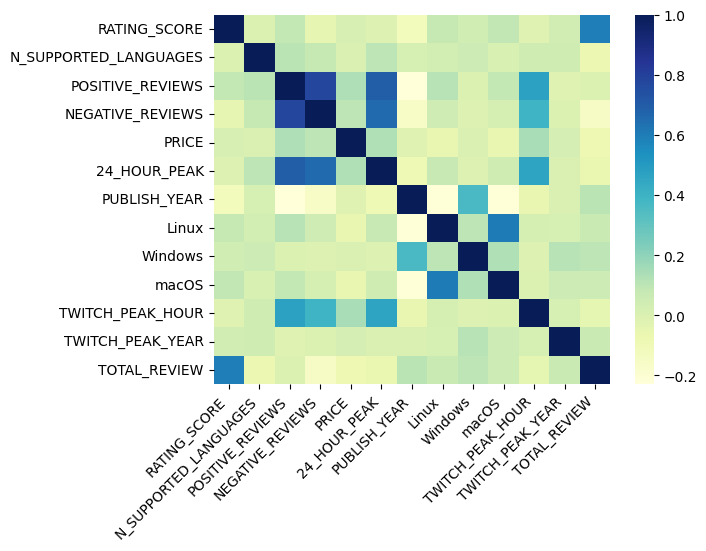

In [3]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

ax = sb.heatmap(numerical_df.corr(), cmap="YlGnBu")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Top 20 DEVELOPERS

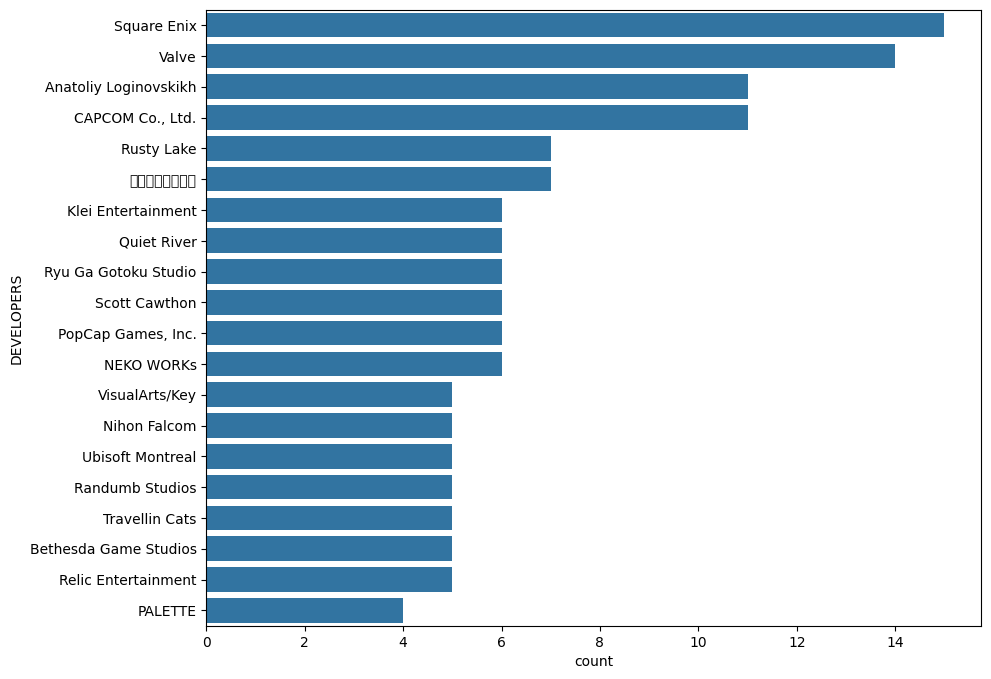

In [4]:
import warnings

warnings.filterwarnings("ignore")

# Explode
df_exploded = df.explode('DEVELOPERS')

top_20_developers = df_exploded['DEVELOPERS'].value_counts().nlargest(20).index

df_top_20 = df_exploded[df_exploded['DEVELOPERS'].isin(top_20_developers)]

plt.figure(figsize=(10, 8))

sb.countplot(y='DEVELOPERS', data=df_top_20, order=top_20_developers)
plt.show()

Top 10 GENRES

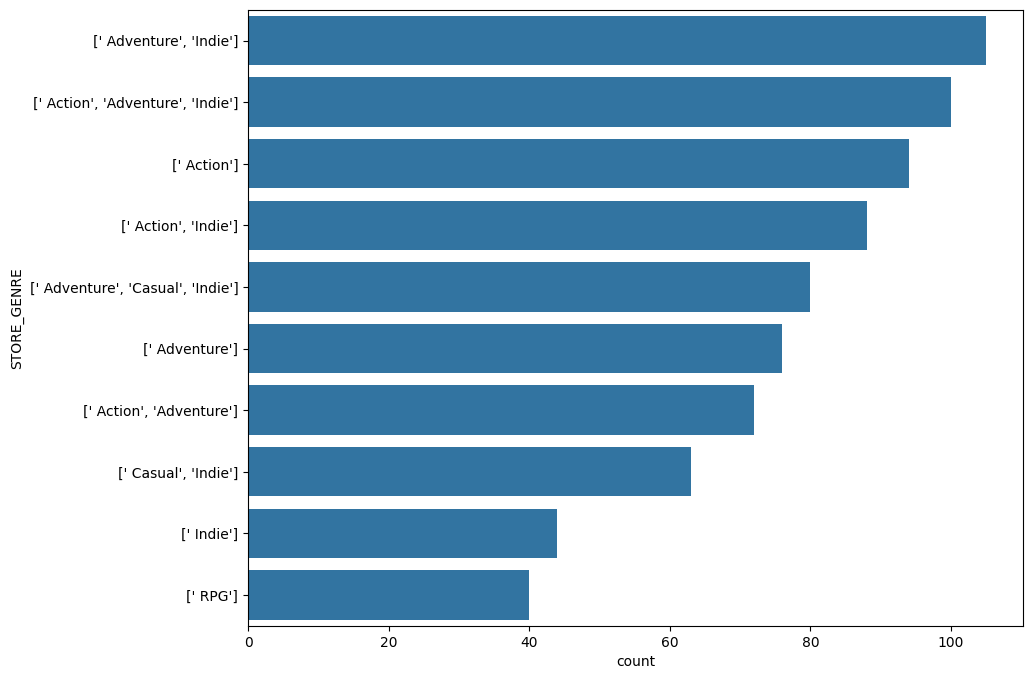

In [5]:
# Explode
df_exploded = df.explode('STORE_GENRE')

top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

plt.figure(figsize=(10, 8))

sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

In [9]:
median_publish_year = df['PUBLISH_YEAR'].median()
filled_publish_year = df['PUBLISH_YEAR'].fillna(median_publish_year)

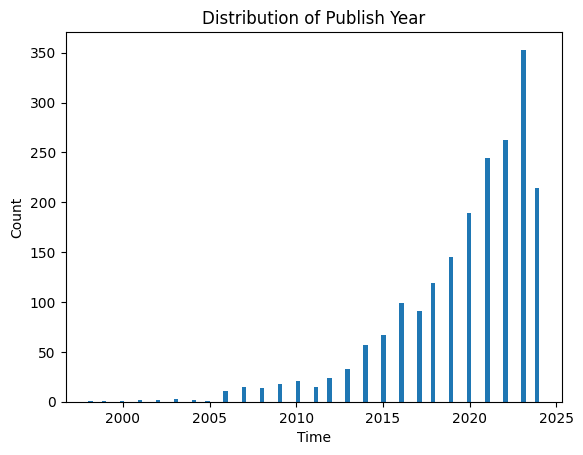

In [10]:
# Plot the histogram
plt.hist(filled_publish_year, bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()


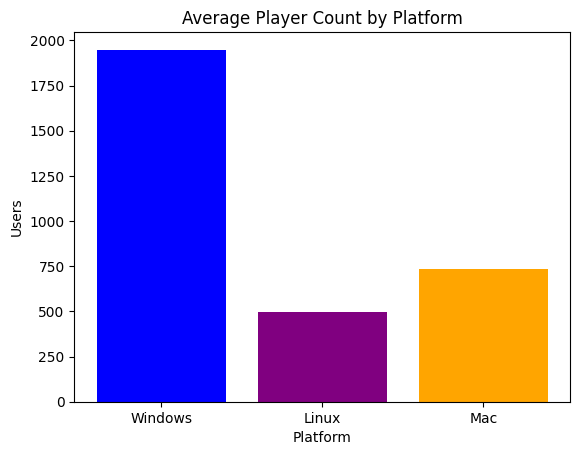

In [11]:
windows_player_counts = df['Windows'].sum()
linux_player_counts = df['Linux'].sum()
mac_player_counts = df['macOS'].sum()

platforms = ['Windows', 'Linux', 'Mac']
average_player_counts = [windows_player_counts, linux_player_counts, mac_player_counts]
colors = ['blue', 'purple', 'orange']

plt.bar(platforms, average_player_counts, color=colors)
plt.title('Average Player Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Users')
plt.show()

In [12]:
cleaned_data_df = df.copy()
cleaned_data_df['PlatformCount'] = cleaned_data_df[['Windows', 'Linux', 'macOS']].sum(axis=1)

platform_groups = cleaned_data_df.groupby('PlatformCount').agg({
    'RATING_SCORE': 'mean',
    'POSITIVE_REVIEWS': 'mean',
    'PRICE': 'mean',
    'NEGATIVE_REVIEWS': 'mean',
})

platform_groups.reset_index(inplace=True)

platform_groups

,PlatformCount,RATING_SCORE,POSITIVE_REVIEWS,PRICE,NEGATIVE_REVIEWS
0,0,8.277965,22507.303571,11.132143,1723.750000
1,1,8.370002,15948.699392,12.390695,1184.107732
2,2,8.452439,15860.381215,9.499834,832.497238
3,3,8.476762,40452.501149,10.967402,1977.843678


In [13]:
cleaned_data_df['PlatformCount']

0       1
1       1
2       2
3       3
4       1
       ..
1999    2
2000    2
2001    2
2002    0
2003    1
Name: PlatformCount, Length: 2004, dtype: int64

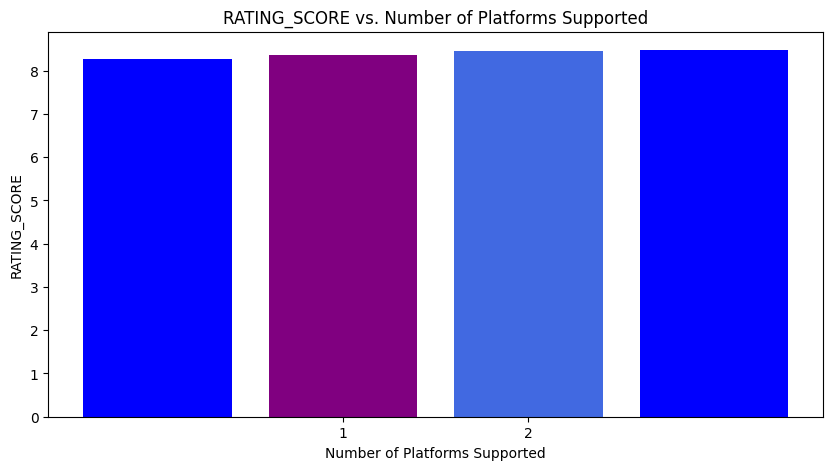

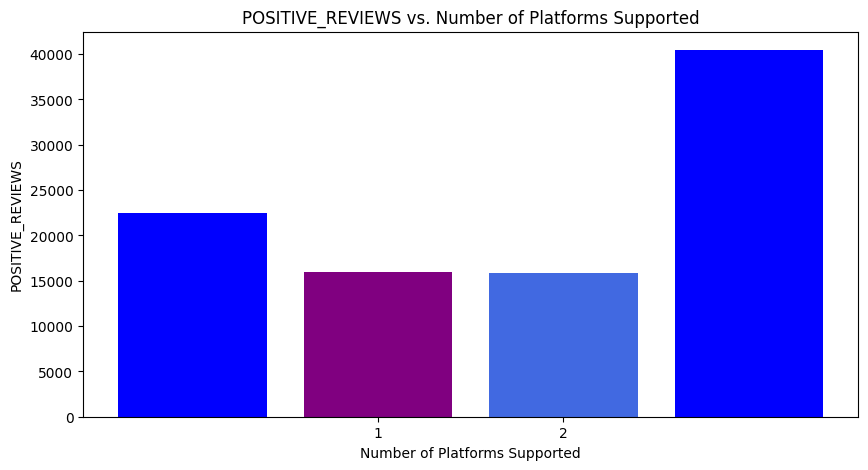

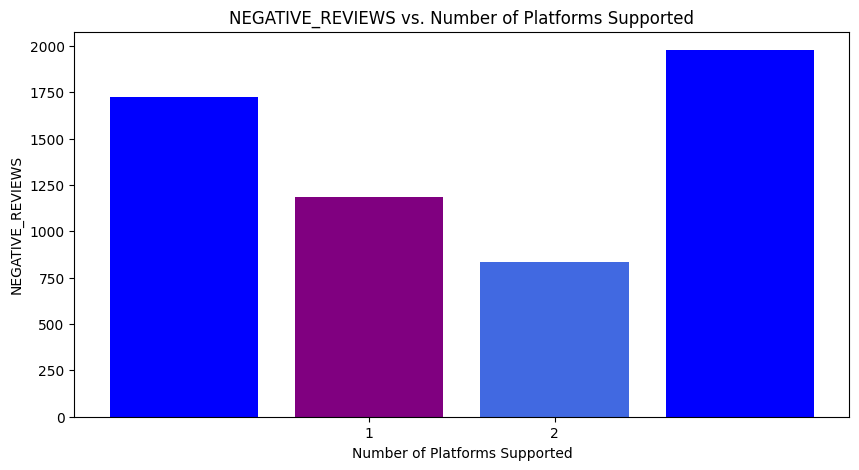

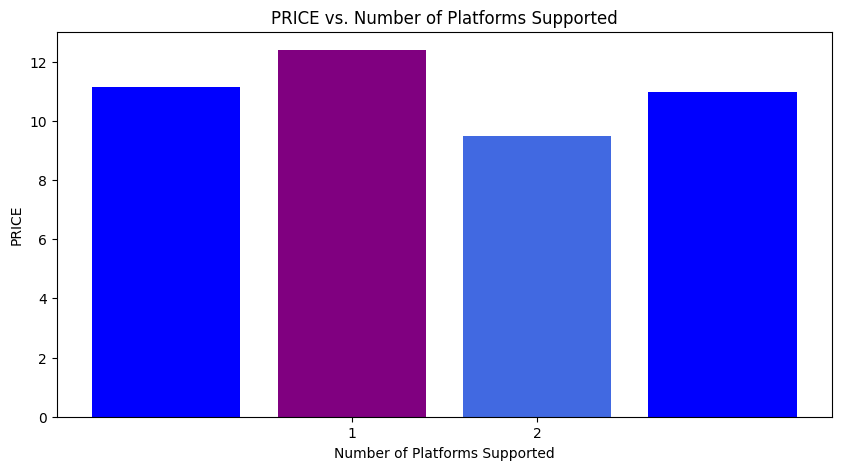

In [14]:
colors = ['blue', 'purple', 'royalblue']

metrics = ['RATING_SCORE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', 'PRICE']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

In [15]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

30                                    Two Cubes
110                                  彼方的她-Aliya
267                   Geneforge 2 - Infestation
280                         风与鸟 - Wind and Bird
285            我在疗养院送人上西天 / Last Stand Delivery
342                Cats and Seek : at Dino Park
347                            Owinka Shooter 2
349                         Of Mice and Moggies
357                          Ghost Girl Lasling
362                             Monkey Business
410                      Liminal Border Part II
439                                Harvest Hunt
471     Is this Game Trying to Kill Me? Preface
692                              Stunt Paradise
817                                  Pogo Rogue
872       Sable's Grimoire: A Dragon's Treasure
1054                            Genome Guardian
1898                               祈風 Inorikaze
1937                                Ego's Spark
1940                                     CHAIRS
Name: NAME, dtype: object

In [16]:
df['TOTAL_REVIEW'].nlargest(n=25)

30      1.000000
110     1.000000
267     1.000000
280     1.000000
285     1.000000
342     1.000000
347     1.000000
349     1.000000
357     1.000000
362     1.000000
410     1.000000
439     1.000000
471     1.000000
692     1.000000
817     1.000000
872     1.000000
1054    1.000000
1898    1.000000
1937    1.000000
1940    1.000000
1316    0.998583
518     0.997389
1323    0.997205
828     0.996124
1235    0.996007
Name: TOTAL_REVIEW, dtype: float64

In [17]:
df.query("TOTAL_REVIEW >= 0.996007").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]

,NAME,DEVELOPERS,STORE_GENRE,TOTAL_REVIEW
30,Two Cubes,Rombo,"[' Adventure', 'Indie']",1.000000
410,Liminal Border Part II,Purple Software,[' Adventure'],1.000000
1937,Ego's Spark,Satsuki,[' Adventure'],1.000000
1898,祈風 Inorikaze,Twilight -日月之境-,"[' Adventure', 'Casual', 'Indie']",1.000000
1054,Genome Guardian,Alpherior,"[' Action', 'Casual', 'Indie', 'RPG']",1.000000
872,Sable's Grimoire: A Dragon's Treasure,Zetsubou,"[' Casual', 'Indie', 'Simulation']",1.000000
817,Pogo Rogue,Bounce Back Games,"[' Action', 'Adventure', 'Indie', 'Free to Pla...",1.000000
692,Stunt Paradise,Brinemedia,"[' Indie', 'Racing', 'Sports']",1.000000
110,彼方的她-Aliya,TDGame,"[' Indie', 'RPG']",1.000000
439,Harvest Hunt,Villainous Games Studio,"[' Action', 'Adventure', 'Indie']",1.000000


In [18]:
df = df.assign(**{"FREE": df.PRICE == 0})
df.head()

,NAME,STORE_GENRE,RATING_SCORE,N_SUPPORTED_LANGUAGES,DEVELOPERS,POSITIVE_REVIEWS,NEGATIVE_REVIEWS,TECHNOLOGIES,PRICE,24_HOUR_PEAK,PUBLISH_YEAR,Linux,Windows,macOS,TWITCH_PEAK_HOUR,TWITCH_PEAK_YEAR,TOTAL_REVIEW,FREE
0,Dragon's Dogma: Dark Arisen,"[' Action', 'Adventure', 'RPG']",8.0,7,Capcom,39271,5015,[],22.49,1064,2016,0,1,0,27368,2016,0.886759,False
1,Forza Horizon 5,"[' Action', 'Adventure', 'Racing', 'Simulation...",8.0,24,Playground Games,156683,21075,[],32.78,16131,2021,0,1,0,81096,2021,0.881440,False
2,Thrive,"[' Casual', 'Indie', 'Simulation', 'Early Acce...",8.0,1,Revolutionary Games Studio,872,70,['Engine.Godot'],2.99,21,2021,1,1,0,145,2022,0.925690,False
3,Layers of Fear (2016),"[' Adventure', 'Indie']",8.0,12,Bloober Team SA,22766,2819,['Engine.Unity'],10.19,31,2016,1,1,1,145384,2018,0.889818,False
4,TaskPals,"[' Indie', 'Free to Play']",8.0,1,lazarche,834,66,"['Detected Technologies (?)', 'SDK.SteamworksN...",0.00,318,2023,0,1,0,3778,2023,0.926667,True


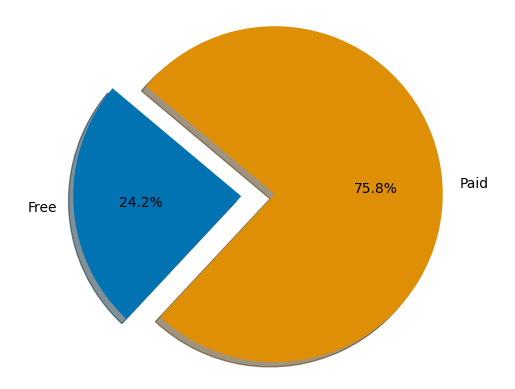

In [19]:
free_prices_dict = dict(df.FREE.value_counts())
labels = "Free", "Paid"
sizes = [free_prices_dict[True], free_prices_dict[False]]
explode = (0.2, 0)

with sb.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

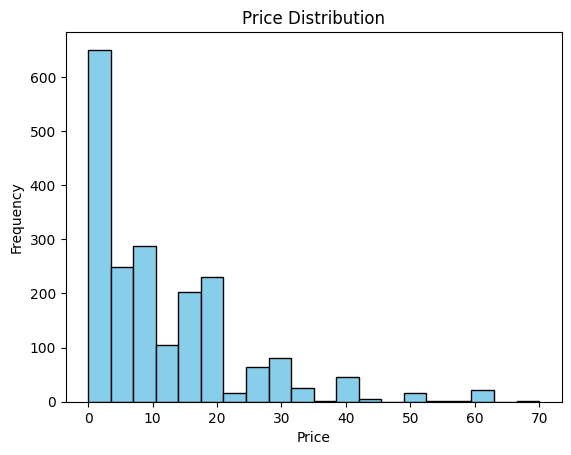

In [20]:
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [21]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


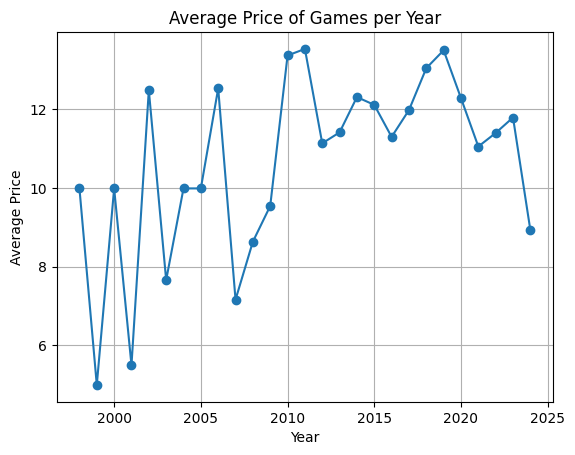

In [22]:
average_price_per_year = df.groupby('PUBLISH_YEAR')['PRICE'].mean()

# Plot the average price for each year
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Games per Year')
plt.grid(True)
plt.show()

In [23]:
df['STORE_GENRE'] = df['STORE_GENRE'].astype(str)

df['PRIMARY_GENRE'] = df['STORE_GENRE'].apply(lambda x: re.findall(r'\b[A-Za-z]+\b', x)[0] if re.findall(r'\b[A-Za-z]+\b', x) else None)


Mean Prices by Genre


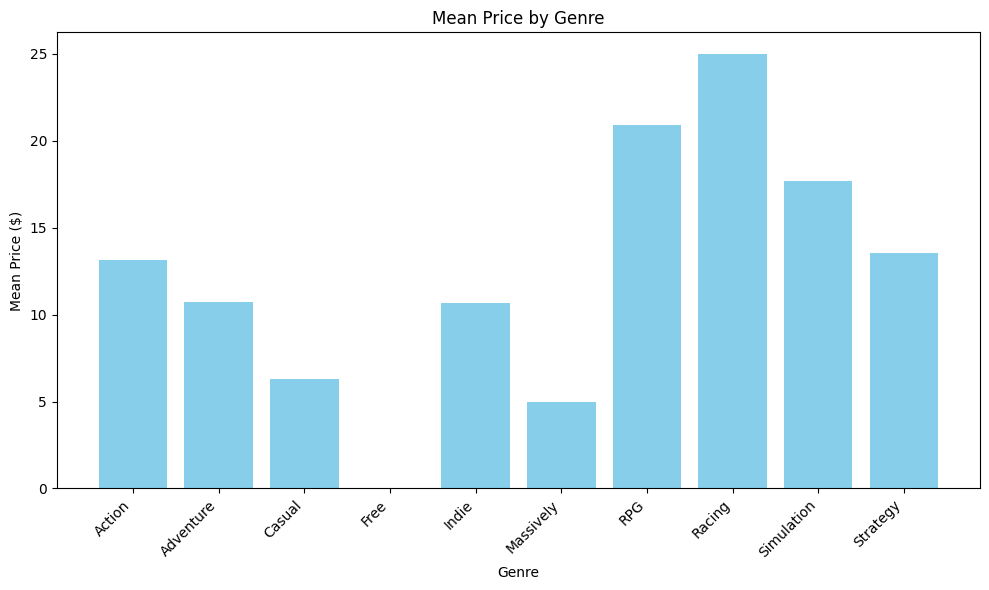

In [24]:
# Mean Price Difference by Genre
print("Mean Prices by Genre")
mean_prices_by_genre = df.groupby('PRIMARY_GENRE')['PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_prices_by_genre['PRIMARY_GENRE'], mean_prices_by_genre['PRICE'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 20 Games by Genre


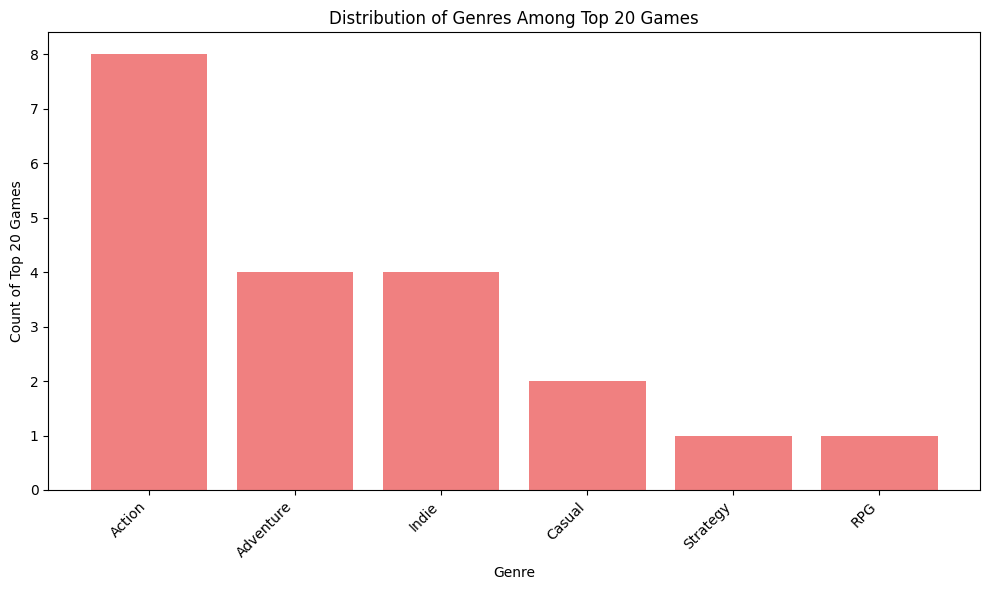

In [25]:
# Comparison of Top 20 Games based on Genre

top_20_games = df.sort_values(by='RATING_SCORE', ascending=False).head(20)

top_20_genre_counts = top_20_games['PRIMARY_GENRE'].value_counts().reset_index()
top_20_genre_counts.columns = ['PRIMARY_GENRE', 'COUNT']
print("Top 20 Games by Genre")

plt.figure(figsize=(10, 6))
plt.bar(top_20_genre_counts['PRIMARY_GENRE'], top_20_genre_counts['COUNT'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count of Top 20 Games')
plt.title('Distribution of Genres Among Top 20 Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

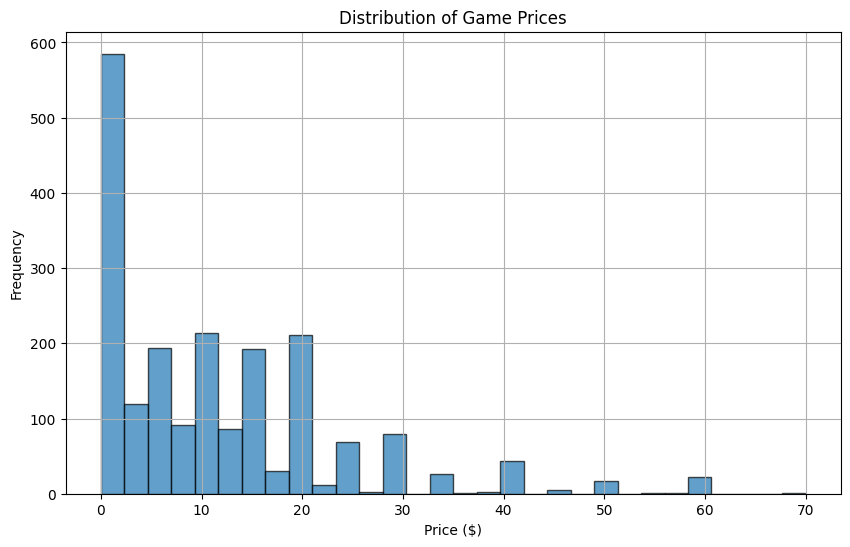

count    2004.000000
mean       11.524376
std        12.077874
min         0.000000
25%         0.990000
50%         9.990000
75%        17.990000
max        69.990000
Name: PRICE, dtype: float64

In [26]:

# Summary statistics for the PRICE column
price_summary = df['PRICE'].describe()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Game Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

price_summary

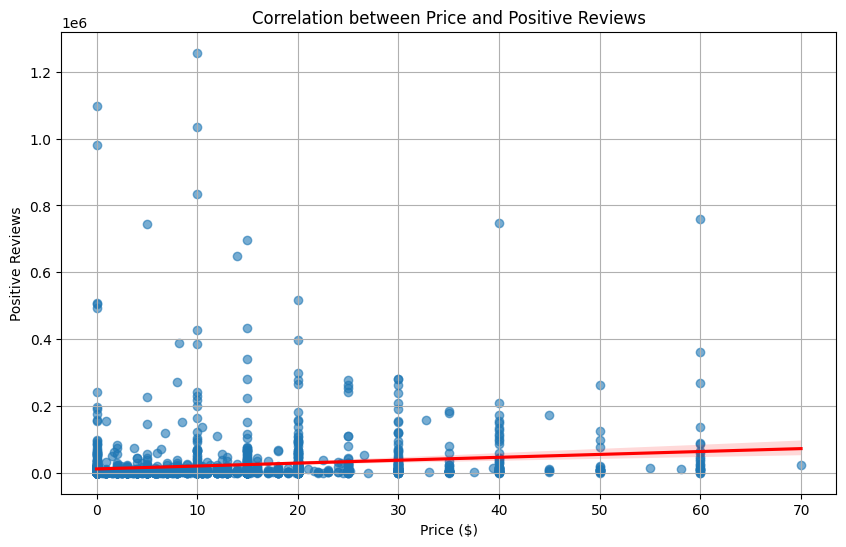

0.13322104703924728

In [27]:

# Analyze the correlation between PRICE and POSITIVE_REVIEWS
price_positive_corr = df[['PRICE', 'POSITIVE_REVIEWS']].dropna()
correlation = price_positive_corr.corr().loc['PRICE', 'POSITIVE_REVIEWS']

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='PRICE', y='POSITIVE_REVIEWS', data=price_positive_corr, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Price and Positive Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Positive Reviews')
plt.grid(True)
plt.show()

correlation

In [28]:
# Developer Analysis
developer_game_count = df['DEVELOPERS'].value_counts()

developer_price_summary = df.groupby('DEVELOPERS')['PRICE'].mean().sort_values(ascending=False)

developer_summary = pd.DataFrame({
    'Game Count': developer_game_count,
    'Average Price': developer_price_summary
}).dropna().sort_values(by='Game Count', ascending=False)

developer_summary

,Game Count,Average Price
DEVELOPERS,,
Square Enix,15,38.262667
Valve,14,6.295000
"CAPCOM Co., Ltd.",11,30.672727
Anatoliy Loginovskikh,11,1.174545
Rusty Lake,7,2.850000
...,...,...
Kane Carter,1,4.990000
"Kairosoft Co.,Ltd",1,4.990000
KPC,1,12.990000


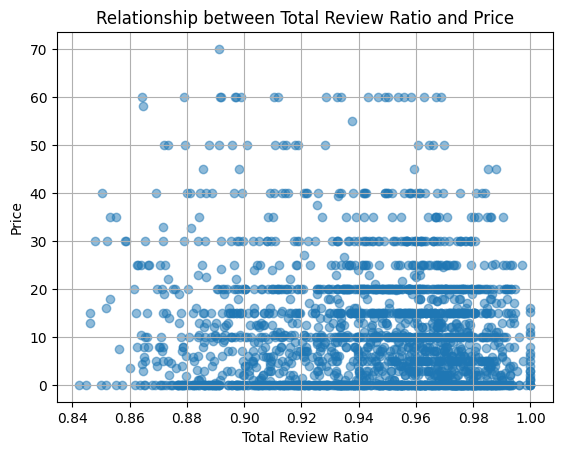

In [29]:
# Plot the relationship between TOTAL_REVIEW and PRICE
plt.scatter(df['TOTAL_REVIEW'], df['PRICE'], alpha=0.5)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.grid(True)
plt.show()


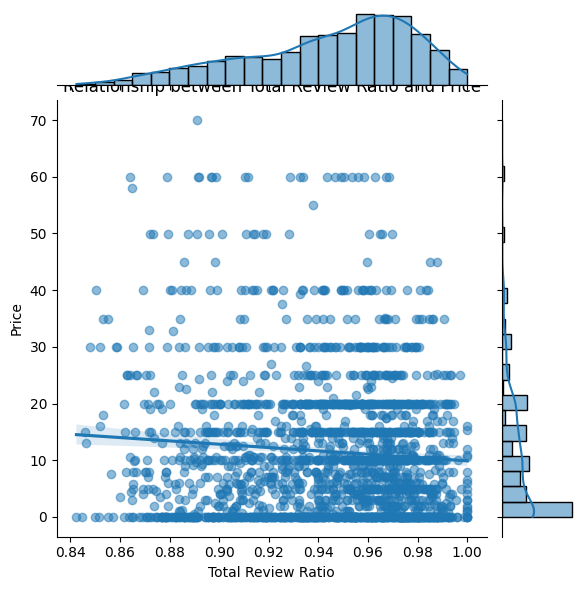

In [30]:
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


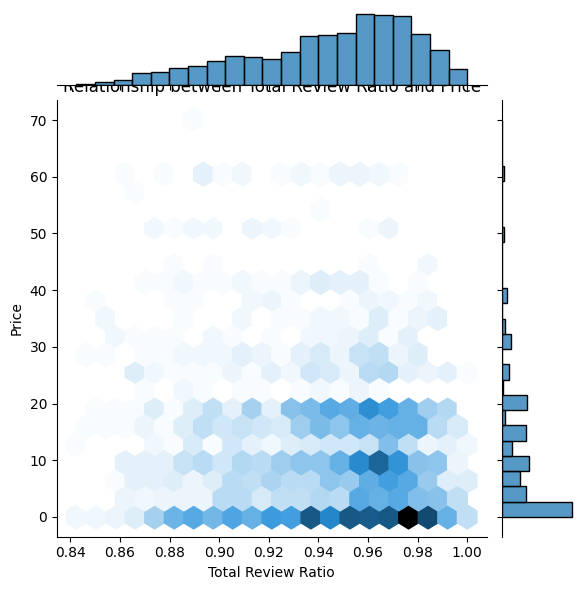

In [31]:
# Create a hexbin plot
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='hex', gridsize=20)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()
